_version 1.0_

<br><br>
<span style="font-size:2em;font-weight:lighter;">194.025 Introduction to Machine Learning</span><br>
<span style="font-size:3em;font-weight:normal;line-height:70%;">Assignment 2: Investigating some Core Concepts</span>

---



Welcome to the second assignment of our course **Introduction to Machine Learning**. You will be able to earn up to a total of 10 points. Please read all descriptions carefully to get a full picture of what you have to do. 

**Remark:** Some code cells are put to read-only. Please execute them regardless as they contain important code. You can run a jupyter cell by pressing `SHIFT + ENTER`, or by pressing the play button on top (in the row where you can find the save button). Cells where you have to implement code contain the comment `# YOUR CODE HERE` followed by `raise NotImplementedError`. Simply remove the `raise NotImplementedError`and insert your code.

Some other code cells start with the comment `# hidden tests ...`. Please do not change them in any way as they are used to grade the tasks after your submission.

## Generalization (3 points)

During the lecture, we talked about the importance of generalization and introduced the **risk** (**expected error**) as well as the **empirical risk** (**training error**). We also mentioned that _regularization_ can be helpful in controlling the model complexity and thus ensure that we can find a model which does well on unseen data, i.e., a model which does not overfit or underfit. In the plot below, you can see the risk curves for a model that we fit on a randomly generated regression dataset using the root mean squared error as loss function. On the x-axis, you can see different values for the regularization parameter $\lambda$. Please answer the following questions about the plot:

![title](errors.png)

1. Which curve is the risk (expected error)?
2. Which curve is the empirical risk (training error)?
3. Please indicate a value for $\lambda$ where the model is underfitting.
4. Please indicate a value for $\lambda$ were the model is overfitting.
5. Please indicate a value for $\lambda$ where the model has a good fit (i.e., does neither underfit, nor overfit).
6. For small values of $\lambda$, will our model tend to have high or low bias?
7. For small values of $\lambda$, will our model tend to have high or low variance?

In [22]:
# For answer1 and answer2, please choose one of the following: "blue" or "orange"
# For answer3, answer4 and answer5, please indicate the value in scientific notation, e.g., answer=10e-3
# For answer6 and answer7, please choose one of the following: "low" or "high"

answer1 = "orange"
answer2 = "blue"
answer3 = 10e+6
answer4 = 10e-12
answer5 = 10e-3
answer6 = "low"
answer7 = "high"

assert(answer1 in ["blue", "orange"])
assert(answer2 in ["blue", "orange"])
assert(10e-12 <= answer3 <= 10e+6)
assert(10e-12 <= answer4 <= 10e+6)
assert(10e-12 <= answer5 <= 10e+6)
assert(answer6 in ["low", "high"])
assert(answer7 in ["low", "high"])

In [23]:
# hidden tests - DO NOT CHANGE THIS CELL

In [24]:
# hidden tests - DO NOT CHANGE THIS CELL

In [25]:
# hidden tests - DO NOT CHANGE THIS CELL

## Regularization for linear regression (4 points)

In the second lecture unit, we briefly talked about regularization as an effective way to alleviate overfitting. More precisely, we looked at _additive_ regularization, i.e., adding a _regularization term_ $\lambda \Omega[h]$ to our objective function, with model $h$, _regularization parameter_ $\lambda$ and _model complexity_ $\Omega[h]$. For simple linear regression (one independent variable, one dependent variable) and $m$ training samples, we modified our objective function as follows:

$$\dfrac{1}{m} \sum\limits_{i=1}^m (y_i - (w_1 x_i + w_0))^2 + \lambda \Omega[h]\;.$$

In the following exercise you have to implement two specific types of additive regularization for linear regression, _lasso regression_ and _ridge regression_ (also called _Tikhonov regression_). For lasso regression, we choose $\Omega[h]$ to be the L1 norm of the parameters, i.e., $\Omega[h] = \|w\|_1 = \sum\limits_{i=0}^p |w_i|$. For ridge regression, we choose $\Omega[h]$ to be the L2 norm of the parameters, i.e., $\Omega[h] = \|w\|_2 = \sum\limits_{i=0}^p w_i^2$.

**Remark**: You can adapt your solution from the previous exercise to include the regularization term. You do not have to implement everything from scratch (but you can, if you really want to)!

In [26]:
import numpy as np

In [27]:
def linear_regression_with_regularization(X, y, initial_w, learning_rate, epochs, reg_param, reg_type):
    
    '''
    X: 1d numpy array containing floats
    y: 1d numpy array containing floats
    initial_w: 1d numpy array containing exactly two float values [w_0, w_1] 
               that are used to initialize w_0 and w_1
    learning_rate: float
    epochs: int
    reg_param: float
    reg_type: string ('lasso' or 'ridge')
    
    expected output: 1d numpy array containing exactly two float values [w_0, w_1]
    '''
    assert(reg_type == 'lasso' or reg_type == 'ridge')

    # Store initial parameter values
    w0 = initial_w[0]
    w1 = initial_w[1]

    # Iteratively apply gradient descent
    for _ in range(epochs):
        # Compute y_pred, i.e., the output of your regressing function given the current weights
        # YOUR CODE HERE
        y_pred = w1 * X + w0
        residuals = y - y_pred
        
        # Compute the gradients for w0 and w1 based on the loss function and the corresponding regression term
        # Hint: Compute the first derivative of the squared error loss function with respect to w0/w1
        if reg_type == 'lasso':
            # YOUR CODE HERE
            w0_deriv = -2 * np.mean(residuals)
            w1_deriv = -2 * np.mean(residuals * X)
            w0_gradient = w0_deriv + reg_param * np.sign(w0)
            w1_gradient = w1_deriv + reg_param * np.sign(w1)
        elif reg_type =='ridge':
            # YOUR CODE HERE
            w0_deriv = -2 * np.mean(residuals)
            w1_deriv = -2 * np.mean(residuals * X)
            w0_gradient = w0_deriv + 2 * reg_param * w0
            w1_gradient = w1_deriv + 2 * reg_param * w1
        else:
            raise ValueError("Incorrect regularisation type.")

        # Update your parameter values using the learning rate
        # YOUR CODE HERE
        w0 -= learning_rate * w0_gradient
        w1 -= learning_rate * w1_gradient
        
    return np.array([w0, w1])

In [28]:
# hidden tests - DO NOT CHANGE THIS CELL

In [29]:
# hidden tests - DO NOT CHANGE THIS CELL

In [30]:
# hidden tests - DO NOT CHANGE THIS CELL

In [31]:
# hidden tests - DO NOT CHANGE THIS CELL

## Regularization for polynomial regression (3 points)

In the next few cells, you should get an intuition why L2 regularization can be useful for polynomial regression.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

First, we create a synthetic dataset with some noise and some outliers. (But feel free to imagine that it's about how happy sheep are based on their weight, which means that they're some very chonky happy sheep but in general, they like to be fit, apparently.)

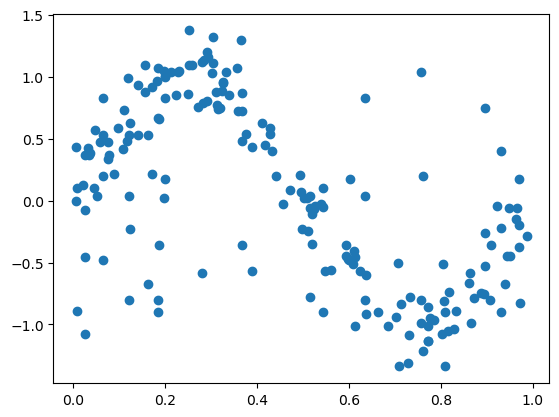

In [12]:
# Set random seed
np.random.seed(42)

# Create dataset
X = np.sort(np.random.rand(150,))
y = np.sin(2 * np.pi * X) + np.random.normal(0,0.2, X.size)

# Add outliers
for x in range(40):
    X = np.append(X, np.random.choice(X.flatten()))
    y = np.append(y, np.random.choice(y.flatten()))

X, y = zip(*sorted(zip(X, y)))
X = np.array(X)
y = np.array(y)

# Visualize dataset
plt.scatter(X, y)

In [13]:
# Some function we need to do some visualizations
def poly_regression_fit(X, y, d):
    '''
    X: 1d numpy array containing floats
    y: 1d numpy array containing floats
    d: a nonnegative integer, giving the degree of the polynomial
    
    expected output: 1d numpy array containing the float values [w_0, w_1, ..., w_d]
    '''
    solution_X = np.stack([X**i for i in range(d+1)])
    solution_w = np.linalg.inv(solution_X @ solution_X.T) @ solution_X @ y

    return solution_w.flatten()

In [14]:
# Some function we need to do some visualizations
def poly_regression_transform(X, w):
    '''
    X: 1d numpy array containing floats
    w: 1d numpy array containing the float values [w_0, w_1, ..., w_d]
    
    expected output: 1d numpy array, same shape as X, containing function values
    '''
    d = w.shape[0]
        
    solution_X = np.stack([X**i for i in range(d)])
    solution_y = solution_X.T @ w.reshape([-1, 1])
    return solution_y.flatten()

Maybe you already have some idea which polynomial degree could be a good fit for the dataset above. However, let us take a look at different polynomial degrees first, and how well they fit the data to get some intuition. We also plot the data-generating function (without noise) in green. Note that in the following plots, $d$ denotes the polynomial degree.

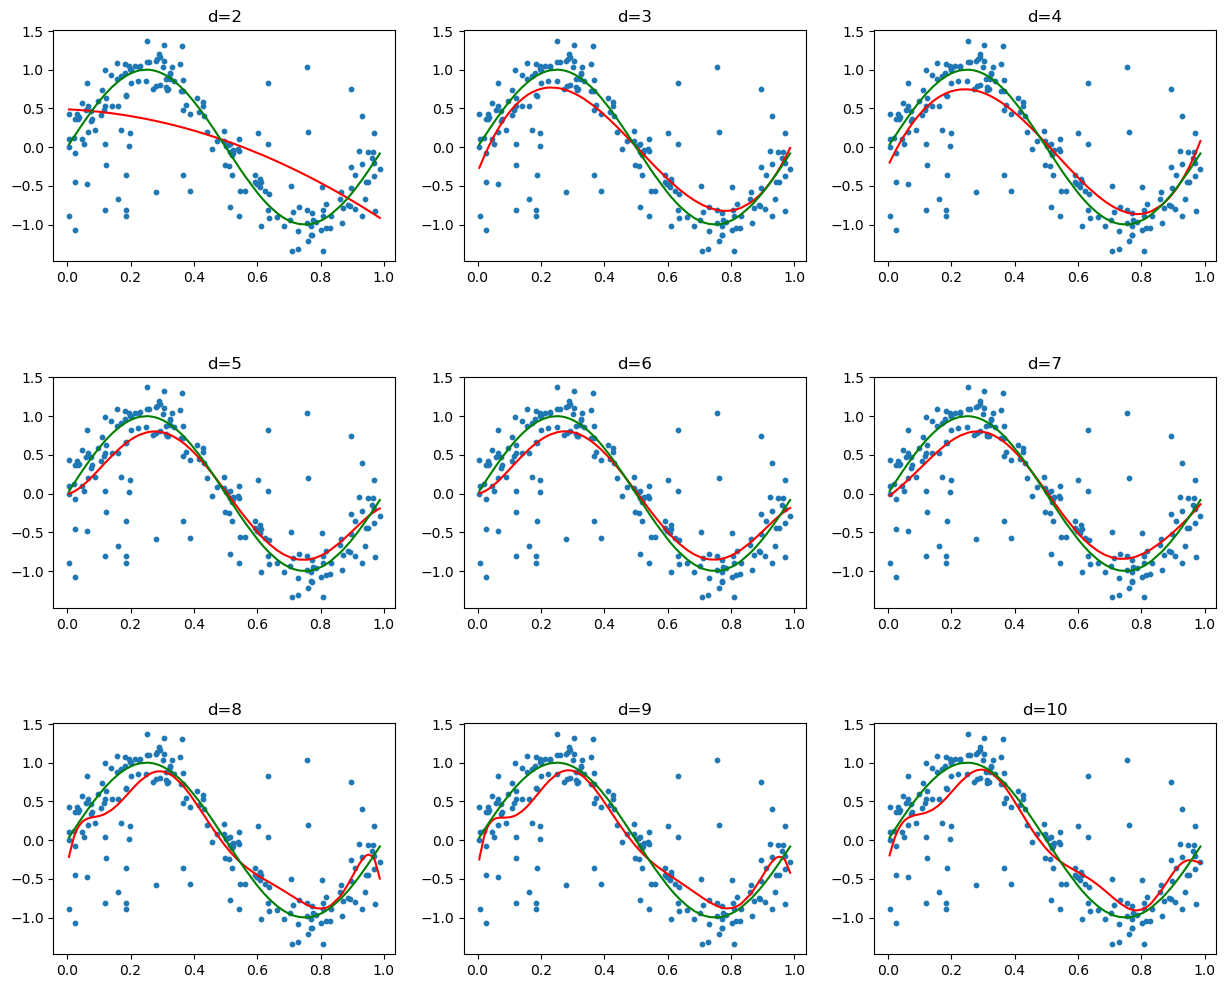

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for d, ax in zip(range(2, 11), axs.ravel()):
    w = poly_regression_fit(X, y, d)
    y_pred = poly_regression_transform(X, w)
    
    ax.scatter(X, y, s=10)
    ax.plot(X, y_pred, c='r')
    ax.plot(X, np.sin(2 * np.pi * X), c='g')
    ax.set_title(f"d={d}")

plt.show()

You should be able to observe that the more we increase the degree, the worse we start to overfit on the data. What about even higher polynomial degrees?

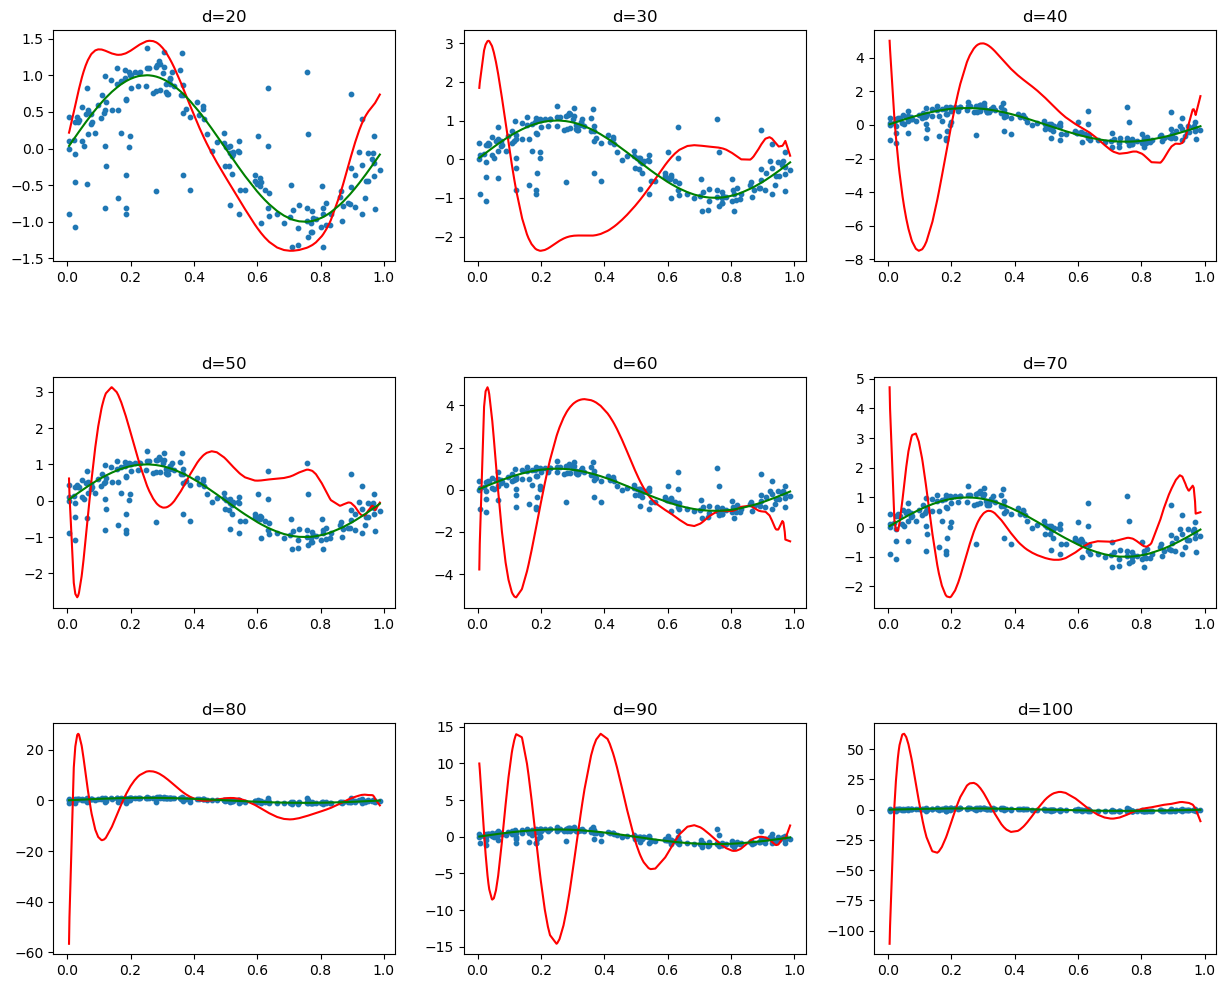

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for d, ax in zip(range(20, 110, 10), axs.ravel()):
    w = poly_regression_fit(X, y, d)
    y_pred = poly_regression_transform(X, w)
    
    ax.scatter(X, y, s=10)
    ax.plot(X, y_pred, c='r')
    ax.plot(X, np.sin(2 * np.pi * X), c='g')
    ax.set_title(f"d={d}")

plt.show()

As you might notice, we start to completely overfit the data. However, we are also still not really close to our data generating function. What could we do?

#### L2 regularization for polynomial regression

We can also add L2 regularization to the objective function for our polynomial regression problem. After a bit of math (feel free to try on your own!), you end up with the following:

$$w = (\lambda \mathbf{I} + \mathbf{X}\mathbf{X}^T)^{-1} \mathbf{X} y$$

In [17]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt

In [44]:
def poly_ridge_regression_fit(X, y, d, reg_param):
    '''
    X: 1d numpy array containing floats
    y: 1d numpy array containing floats
    d: a nonnegative integer, giving the degree of the polynomial
    reg_param: float ($\lambda$)
    
    expected output: 1d numpy array containing the float values [w_0, w_1, ..., w_d]
    '''
    poly_X = np.stack([X**i for i in range(d+1)])
    # Implement the closed form solution for polynomial regression using L2 (ridge) regularisation
    # YOUR CODE HERE
    solution_w = np.linalg.inv(reg_param * np.identity(d+1) + poly_X @ poly_X.T) @ poly_X @ y
    
    return solution_w.flatten()

In [45]:
# hidden tests - DO NOT CHANGE THIS CELL

In [46]:
# hidden tests - DO NOT CHANGE THIS CELL

Now let us look at the high degree polynomials from above again.

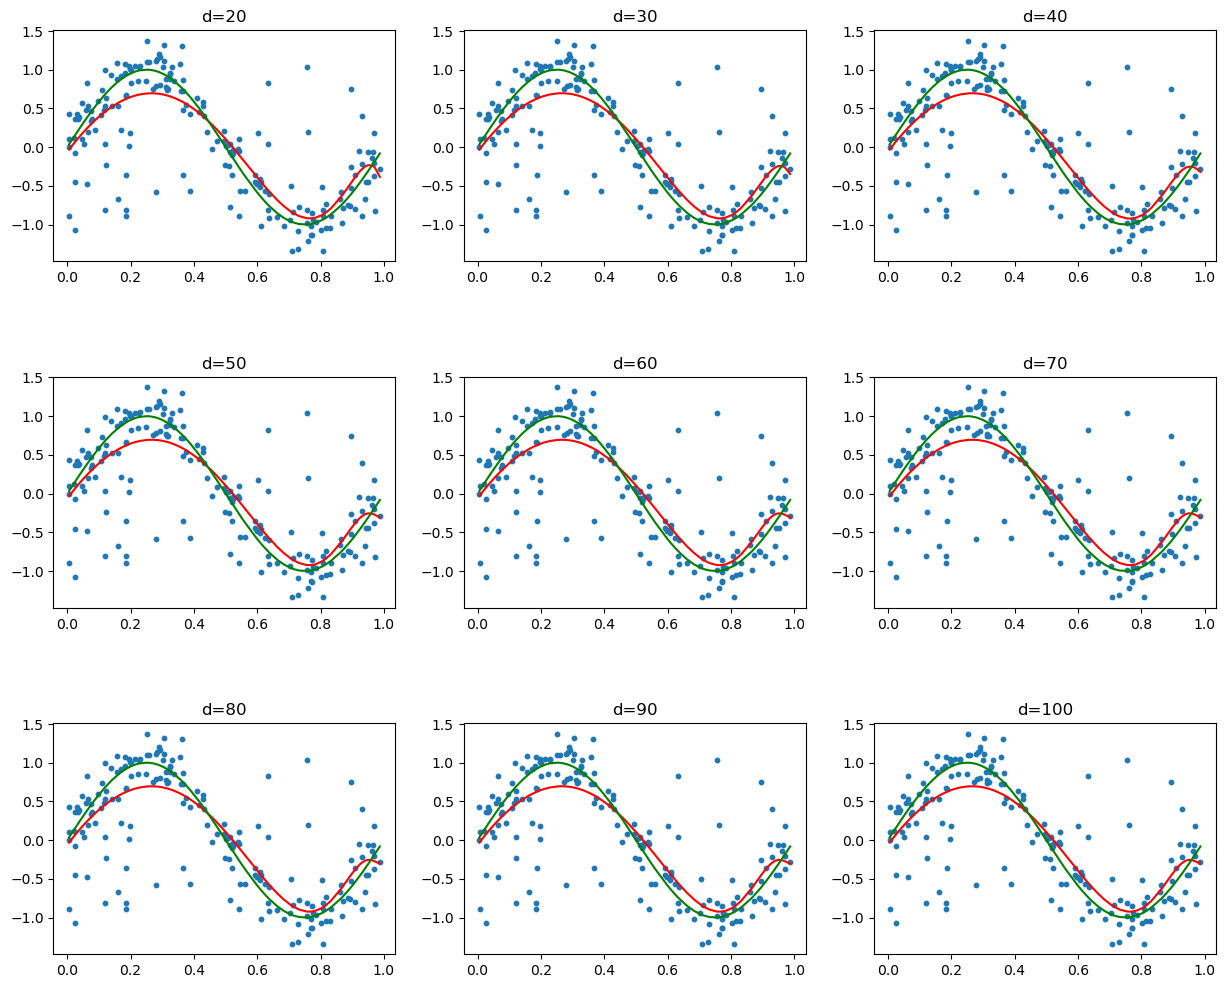

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for d, ax in zip(range(20, 110, 10), axs.ravel()):
    w = poly_ridge_regression_fit(X, y, d, 0.009)
    y_pred = poly_regression_transform(X, w)
    
    ax.scatter(X, y, s=10)
    ax.plot(X, y_pred, c='r')
    ax.plot(X, np.sin(2 * np.pi * X), c='g')
    ax.set_title(f"d={d}")

plt.show()

You should be able to observe that we get a much, much better fit. Indeed, compare how similar degree 10 with well chosen $\lambda$ is to degree 3 without regularization.

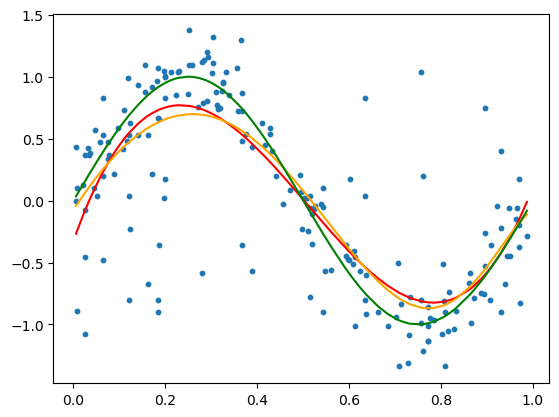

In [48]:
w = poly_regression_fit(X, y, 3)
y_pred = poly_regression_transform(X, w)

w_ridge = poly_ridge_regression_fit(X, y, 10, 0.009)
y_pred_ridge = poly_regression_transform(X, w_ridge)

plt.scatter(X, y, s=10)
plt.plot(X, y_pred, c='r')
plt.plot(X, y_pred_ridge, c='orange')
plt.plot(X, np.sin(2 * np.pi * X), c='g')

plt.show()